ASSIGNMENT ONE: WEB SCRAPING WEATHER DATA



BISIMBEKO REMMY


Access Number - B26099

Reg. No. - J24M19/011

I have identified a Suitable Weather Website that provides the data I need and does not have strict anti-scraping measures. 

OpenWeatherMap

This is how I Set Up of my Environment

Install necessary libraries in Python:

In [104]:
! pip install requests beautifulsoup4 pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


Step 1: Scrape Weather Data

For this assignment, we will use a weather website, https://openweathermap.org, but there is need to adjust the selectors based on the actual HTML structure of the website we choose to scrape.

In [105]:
# Import libraries 

import requests
import pandas as pd

In [106]:
# My Open Weather API key
api_key = '3d810fdbd8f77c9ac45b30f4acdfe671'

In [107]:
# List of African cities with their coordinates
african_cities = [
    {'name': 'Nairobi', 'lat': -1.286389, 'lon': 36.817223},
    {'name': 'Lagos', 'lat': 6.5244, 'lon': 3.3792},
    {'name': 'Cairo', 'lat': 30.0444, 'lon': 31.2357},
    {'name': 'Cape Town', 'lat': -33.9249, 'lon': 18.4241},
    {'name': 'Accra', 'lat': 5.6037, 'lon': -0.1870},
    # You can add more cities if you wish
]

In [108]:
# This Function gets weather data from Open Weather API using specified coordinates
def get_weather_data(lat, lon):
    api_url = f'http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}&units=metric'
    response = requests.get(api_url)
    data = response.json()

    if response.status_code == 200:
        precipitation = data.get('rain', {}).get('1h', 0)  # Get precipitation, default to 0 if missing
        return {
            'City': data['name'],
            'Date': pd.to_datetime('today').date(), # Today
            'Temperature': data['main']['temp'], # In celcius
            'Humidity': data['main']['humidity'],
            'Wind Speed': data['wind']['speed'], # Speed in m/s
            'Condition': data['weather'][0]['description'],
            'Precipitation': precipitation  # Add precipitation data as part of the items to analyse
        }
    else:
        # Print the eror if any
        print(f"Error fetching data for coordinates ({lat}, {lon}): {data.get('message', 'Unknown error')}")
        return None

In [109]:
# Main execution here
all_weather_data = []

# Get data for each city
for city in african_cities:
    api_data = get_weather_data(city['lat'], city['lon'])
    if api_data:
        all_weather_data.append(api_data)

In [110]:
# Store data in a structured format
df = pd.DataFrame(all_weather_data)

# Save the DataFrame to a CSV file
df.to_csv('Bisimbeko.csv', index=False)  # Save as csv file

print("Weather data for African cities saved to Bisimbeko.csv")

Weather data for African cities saved to Bisimbeko.csv


Step 2: Analyze the Data

Now that we have the data saved in a CSV file, let me load it and perform the analysis.

Let me first load the neccessary libraries

In [111]:
! pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [112]:
! pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [113]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import joblib

In [114]:
# Load the dataset
df = pd.read_csv('Bisimbeko.csv')

In [115]:
# Check the columns and the first few rows of the DataFrame
print("Columns in the DataFrame:", df.columns)
print(df.head())

Columns in the DataFrame: Index(['City', 'Date', 'Temperature', 'Humidity', 'Wind Speed', 'Condition',
       'Precipitation'],
      dtype='object')
         City        Date  Temperature  Humidity  Wind Speed  \
0     Nairobi  2025-02-20        28.02        23        6.17   
1    Shogunle  2025-02-20        34.12        59        6.69   
2  Al ‘Atabah  2025-02-20        17.33        48        5.66   
3   Cape Town  2025-02-20        24.88        64        0.89   
4       Accra  2025-02-20        32.05        62        7.20   

          Condition  Precipitation  
0        few clouds              0  
1  scattered clouds              0  
2     broken clouds              0  
3   overcast clouds              0  
4        light rain              0  


In [116]:
# Convert temperature to string and then to numeric (remove any non-numeric characters)
df['Temperature'] = df['Temperature'].astype(str).str.replace('°', '').astype(float)

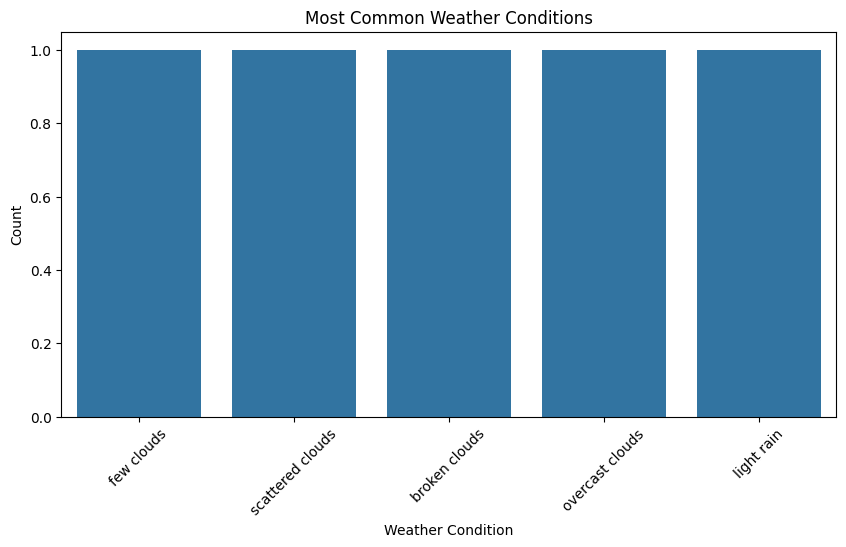

In [117]:
# a. What are the most common weather conditions observed?
condition_counts = df['Condition'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Most Common Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [118]:
# b. What is the average temperature recorded?
average_temperature = df['Temperature'].mean()
print(f'Average Temperature: {average_temperature:.2f}°C')

Average Temperature: 27.28°C


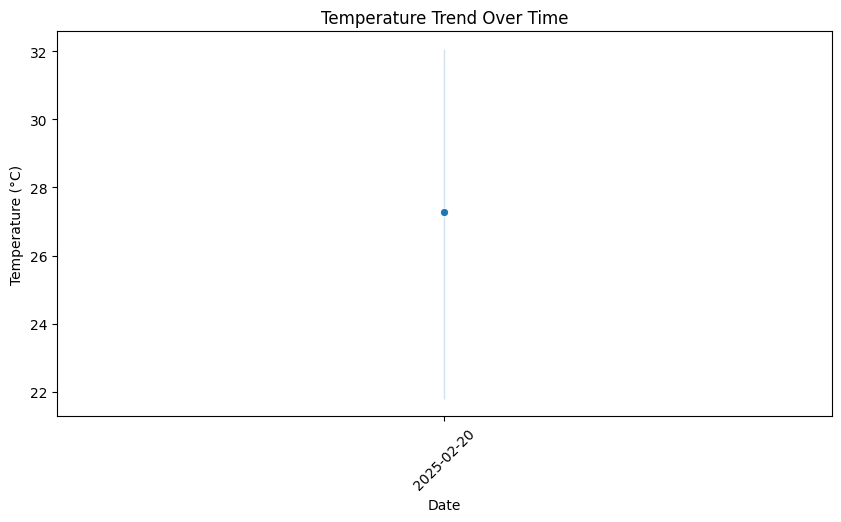

In [119]:
# c. What trends or patterns can be identified from the data?
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Temperature', marker='o')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

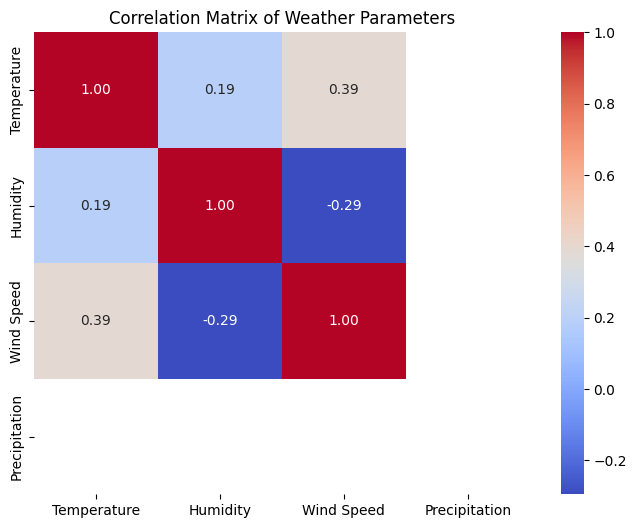

In [120]:
# d. Identify which weather parameters have the highest correlation with "Temperature"
# Convert other parameters to numeric if necessary
# Check if 'Humidity', 'Wind Speed', and 'Precipitation' columns exist
if 'Humidity' in df.columns:
    df['Humidity'] = df['Humidity'].astype(str).str.replace('%', '').astype(float)
else:
    print("Humidity column not found.")

if 'Wind Speed' in df.columns:
    df['Wind Speed'] = df['Wind Speed'].astype(str).str.replace(' mph', '').astype(float)
else:
    print("Wind Speed column not found.")

if 'Precipitation' in df.columns:
    df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce')
else:
    print("Precipitation column not found.")

# Solution: Filter and convert columns to numeric before correlation calculation
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation']

# Convert columns to numeric if necessary
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix using only numeric data
correlation_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [121]:
# e. Implement an unsupervised machine learning model to classify the different weather patterns
# Using K-Means clustering
features = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation']].dropna()
kmeans = KMeans(n_clusters=3)  # Choose the number of clusters
df['Cluster'] = kmeans.fit_predict(features)

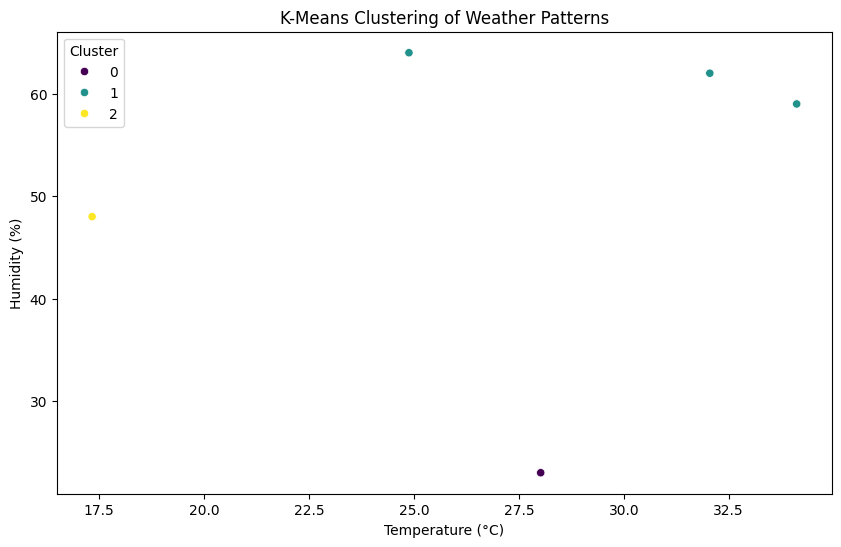

In [122]:
# Let us visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Humidity', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Weather Patterns')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Cluster')
plt.show()

In [123]:
# f. Save the trained machine learning model using joblib
joblib.dump(kmeans, 'kmeans_weather_model.pkl')

['kmeans_weather_model.pkl']

In [124]:
# Using joblib
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [125]:
# Load the weather data from the CSV file
df = pd.read_csv('Bisimbeko.csv')

In [126]:
# Print Columns
print(df.columns)


Index(['City', 'Date', 'Temperature', 'Humidity', 'Wind Speed', 'Condition',
       'Precipitation'],
      dtype='object')


In [127]:
# Preprocess the data: Convert columns to numeric and drop rows with missing values
# Convert columns to numeric (handling errors)
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Temperature', 'Humidity', 'Wind Speed'])


In [128]:
# Select the relevant numerical features for clustering
features = ['Temperature', 'Humidity', 'Wind Speed']
X = df[features]

In [129]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [130]:
# Choose the number of clusters
optimal_k = 3  # You can change this based on the Elbow plot or prior knowledge

In [131]:
# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [132]:
# Save the K-Means model using joblib
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(scaler, 'scaler_model.joblib')

['scaler_model.joblib']

In [133]:
# Save the DataFrame to CSV 

df.to_csv('Bisimbeko.csv', index=False)

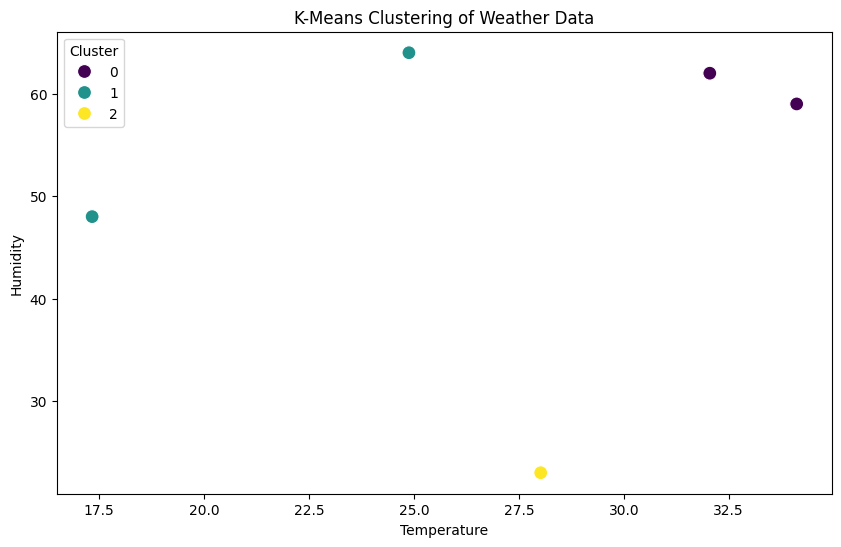

In [134]:
# Lets Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of Weather Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Cluster')
plt.show()

In [135]:
# Print the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centroids (Temperature, Humidity, Wind Speed):")
print(centroids)


Cluster Centroids (Temperature, Humidity, Wind Speed):
[[33.085 60.5    6.945]
 [21.105 56.     3.275]
 [28.02  23.     6.17 ]]


In [136]:
# Usinf DBSCAN
from sklearn.cluster import DBSCAN

In [137]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN Cluster'] = dbscan.fit_predict(X_scaled)

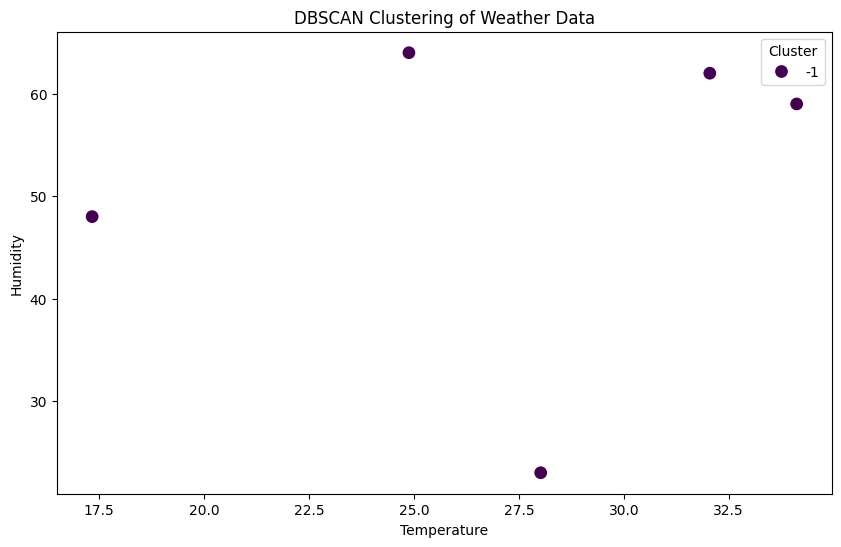

In [138]:
# Visualize the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='DBSCAN Cluster', palette='viridis', data=df, s=100)
plt.title('DBSCAN Clustering of Weather Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Cluster')
plt.show()


In [139]:
# Using K clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Preprocess the data: Convert columns to numeric and drop rows with missing values
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df['Wind Speed'] = pd.to_numeric(df['Wind Speed'], errors='coerce')
df = df.dropna(subset=['Temperature', 'Humidity', 'Wind Speed'])

In [141]:
# Check the number of data points
num_samples = df.shape[0]
print(f"Number of data points: {num_samples}")

Number of data points: 5


In [142]:
# Ensure k does not exceed the number of samples
max_k = min(5, num_samples)  # Set k to the smaller of 5 or the number of data points

In [143]:
# Select the relevant numerical features for clustering
features = ['Temperature', 'Humidity', 'Wind Speed']
X = df[features]

In [144]:
# Then Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [145]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, max_k + 1):  # Test from 1 to max_k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

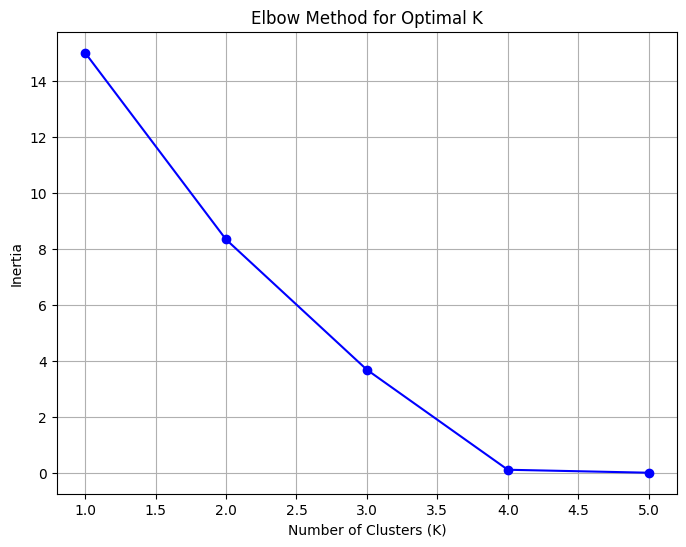

In [146]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_k + 1), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [147]:
# Choose the optimal number of clusters (e.g., k = 3)
optimal_k = 3  # You can change this based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

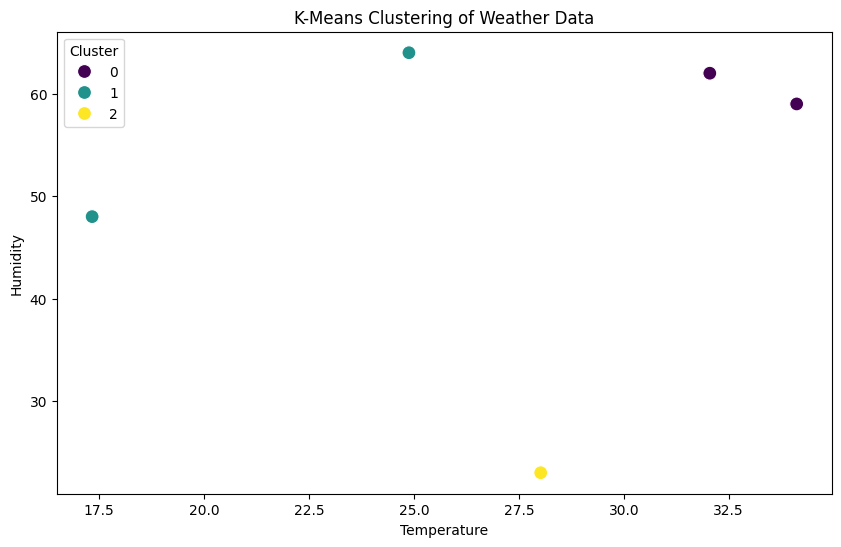

In [148]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Humidity', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('K-Means Clustering of Weather Data')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Cluster')
plt.show()

In [149]:
# Print the centroids of the clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centroids (Temperature, Humidity, Wind Speed):")
print(centroids)


Cluster Centroids (Temperature, Humidity, Wind Speed):
[[33.085 60.5    6.945]
 [21.105 56.     3.275]
 [28.02  23.     6.17 ]]
